# Law of Large Numbers

%%latex
\textbf{Strong Law (LLN):} Sample average converges \textit{almost surely a.s} to population mean. 
Mathematically speaking, as N $\to \infty$

\begin{equation} \bar{X}_N=\frac{X_1 +X_2+...+X_N}{N} \to \mu \end{equation} 

The probability that, as the number of trials N goes to infinity, the average of the observations converges to the expected value, is equal to one
\\ $$Pr(\lim_{N\to\infty} \bar{X}_N = \mu)=1 $$
\textbf{Weak Law (LLN) Khinchin law :}  The sample average converges in \textit{probability} towards the expected value. 
$$\lim_{N\to\infty} Pr(| \bar{X}_N - \mu|>\epsilon) = 0$$

In [5]:
## LAW OF LARGE NUMBERS

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


def lln(ssize,dist):
    print(ssize,dist)
    print(type(ssize),type(dist))
    
    np.random.seed(200) # set seed for reproducability of results
    
    "PLOT SAMPLE DISTRIBUTION"
    ss = ssize
    dist_type = dist
    
    def normal():
        tmp = np.random.normal(size=ss)
        return tmp 
    def uniform():
        tmp = np.random.uniform(size=ss) #default: a=lowerbound =0.0 ; b=upperbound =1.0
        return tmp 
    def binomial():
        tmp = np.random.binomial(n=10,p=0.5,size=ss) # Num trials = 10, prob= 0.5
        return tmp 
    def poisson():
        tmp = np.random.poisson(lam=2,size=ss) #lam = average occurence of discrete event
        return tmp 
    def logistic():
        tmp = np.random.logistic(loc=0,scale=2,size=ss) #default: loc =mean of the peak= 0; scale =standard deviation=1
        return tmp 
    def multinomial():
        tmp = np.random.multinomial(n=6,pvals=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],size=ss) #default(dice roll): n= numoutcomes=6; pvals=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
        return tmp 
    def exponential():
        tmp = np.random.exponential(scale=1,size=ss) #default: scale =inverse of rate =1.0.
        return tmp 
    def chisquare():
        tmp = np.random.chisquare(df=2,size=ss) #df - (degree of freedom).
        return tmp 
    def rayleigh():
        tmp = np.random.rayleigh(scale=1.0,size=ss) #default:scale - (standard deviation)=1.0
        return tmp 
    def pareto():
        tmp = np.random.pareto(a=2,size=ss) # a - shape parameter.
        return tmp 
    def zipf():
        tmp = np.random.zipf(a=2, size=ss) # a - shape parameter.
        return tmp
    def the_count():
        print("No distribution chosen")
    
    # Dispatcher aides in calling different functions based on parameters.    
    dispatcher = {
        'Normal': normal, 'Uniform': uniform, 'Binomial': binomial, 'Poisson': poisson, 'Logistic': logistic, 
        'Multinomial': multinomial, 'Exponential': exponential, 'Chi-square': chisquare, 'Rayleigh': rayleigh, 
        'Pareto': pareto, 'Zipf': zipf, 'The_count': the_count
    }

    x = dispatcher[dist_type]() # Assign return value of different function calls (normal,uniform,etc.) to x.
    #print(x)
    
    fig, ax = plt.subplots(1,1,sharey=True,figsize = (5,5))

    mu = x.mean()
    sigma = x.std()
    min_xlim, max_xlim = plt.xlim()
    min_ylim, max_ylim = plt.ylim()
    print(min_xlim, max_xlim,min_ylim, max_ylim)
    boxtext = '\n'.join((
    r'Sample Size:%.f ' % (ss, ) ,
    r'$\mu=%.3f$' % (mu, ),
    r'$\sigma=%.3f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='grey', alpha=0.5)
    #sns.distplot(x,color='Green')
    ax.hist(x,bins=50,color='Green',density=1)
    ax.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
    fig.text(1,1, boxtext, fontsize=12,ha='left', va='top', bbox=props)
    ax.set_title("Distribution of the Random Sample")
    ax.set_xlabel("Outcome (x)")
    ax.set_ylabel("Density")
    fig.savefig('lln.png', bbox_inches="tight")
    print(type(fig))
    print(type(ax))
    return x


10000 Normal
<class 'int'> <class 'str'>
0.0 1.0 0.0 1.0
<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


numpy.ndarray

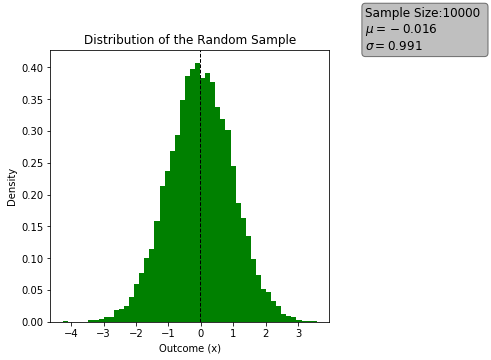

In [7]:
y= lln(10000,'Normal')
type(y)